<a href="https://colab.research.google.com/github/ThilanRandika/deep-learning-labs/blob/lab1/lab1/answers/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plots
import seaborn as sns

np.random.seed(42)  # reproducibility

In [ ]:
# scale=1.0 => λ = 1  (mean = 1/λ = 1)
arr_4x4 = np.random.exponential(scale=1.0, size=(4, 4))
arr_4x4

array([[0.46926809, 3.01012143, 1.31674569, 0.91294255],
       [0.16962487, 0.16959629, 0.05983877, 2.01123086],
       [0.91908215, 1.23125006, 0.02079931, 3.50355748],
       [1.78642954, 0.23868763, 0.20067899, 0.20261142]])

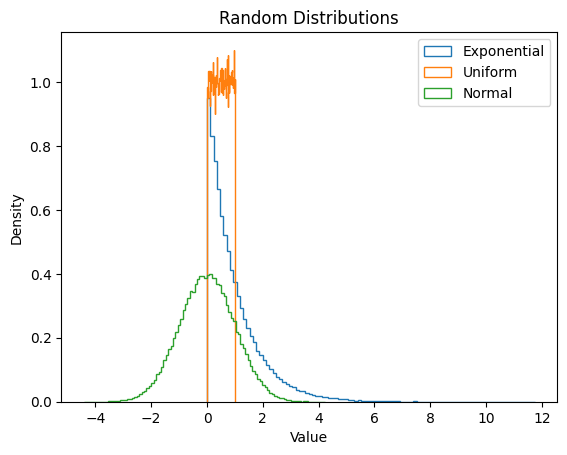

In [ ]:
N = 100_000
exp_data = np.random.exponential(1.0, N)
uni_data = np.random.rand(N)            # uniform [0, 1)
norm_data = np.random.randn(N)          # normal mean=0, std=1

# Try different bins to improve readability (e.g., 60, 100, 150)
bins = 100

plt.figure()
plt.hist(exp_data, density=True, bins=bins, histtype="step", label="Exponential")
plt.hist(uni_data, density=True, bins=bins, histtype="step", label="Uniform")
plt.hist(norm_data, density=True, bins=bins, histtype="step", label="Normal")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

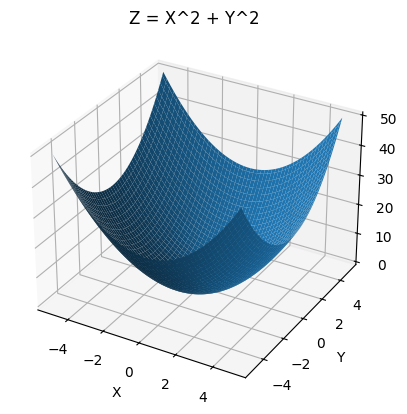

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Z = X^2 + Y^2')
plt.show()

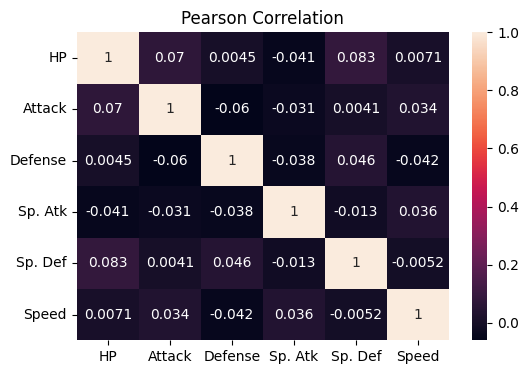

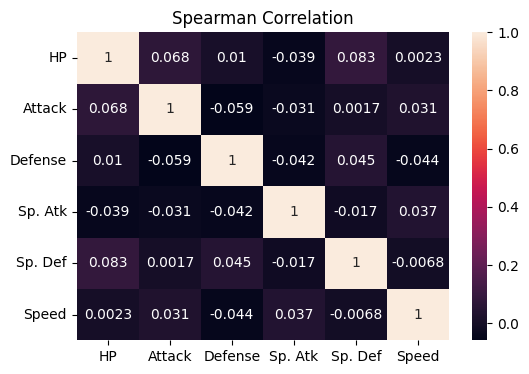

In [ ]:
# Example: simulate a small DataFrame if you don't have the exact one yet.
# Replace this with your real df from the tutorial notebook once you open it.
df = pd.DataFrame({
    "HP": np.random.randint(20, 200, 500),
    "Attack": np.random.randint(10, 200, 500),
    "Defense": np.random.randint(10, 200, 500),
    "Sp. Atk": np.random.randint(10, 200, 500),
    "Sp. Def": np.random.randint(10, 200, 500),
    "Speed": np.random.randint(10, 200, 500),
})

features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

pearson_corr = df[features].corr(method="pearson")
spearman_corr = df[features].corr(method="spearman")

plt.figure(figsize=(6,4))
sns.heatmap(pearson_corr, annot=True)
plt.title("Pearson Correlation")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(spearman_corr, annot=True)
plt.title("Spearman Correlation")
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Au_nanoparticle_dataset.csv")

# Keep ONLY these four features
cols = ["N_total", "N_bulk", "N_surface", "R_avg"]
new_df = df[cols].copy()
new_df.head()

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [ ]:
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
summary = new_df.describe().T  # count, mean, std, min, 25%, 50%, 75%, max
summary

,count,mean,std,min,25%,50%,75%,max
N_total,4000.0,3476.786500,3679.286769,236.0000,1061.000000,1867.00000,4503.000000,14277.0000
N_bulk,4000.0,2521.550250,2976.232459,89.0000,618.750000,1199.00000,3183.000000,11580.0000
N_surface,4000.0,955.236250,721.870220,137.0000,437.000000,666.00000,1301.750000,3190.0000
R_avg,4000.0,20.654363,7.610716,8.5286,15.160725,18.62925,25.525125,39.2392


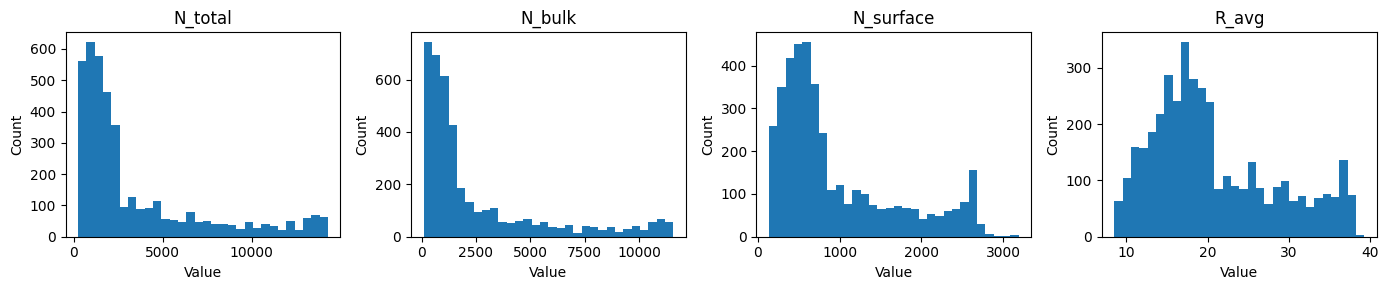

In [ ]:
plt.figure(figsize=(14,3))
for i, c in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    plt.hist(new_df[c], bins=30)
    plt.title(c)
    plt.xlabel("Value"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

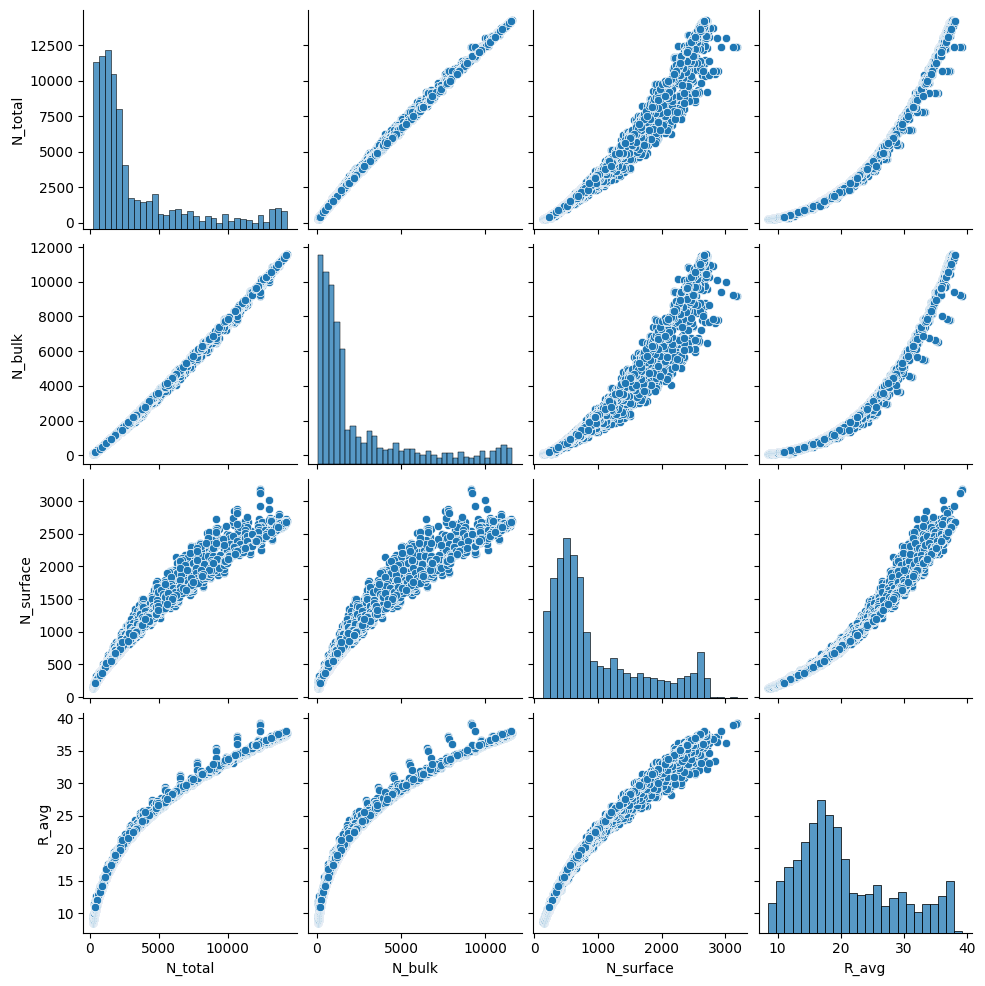

In [ ]:
sns.pairplot(new_df)
plt.show()

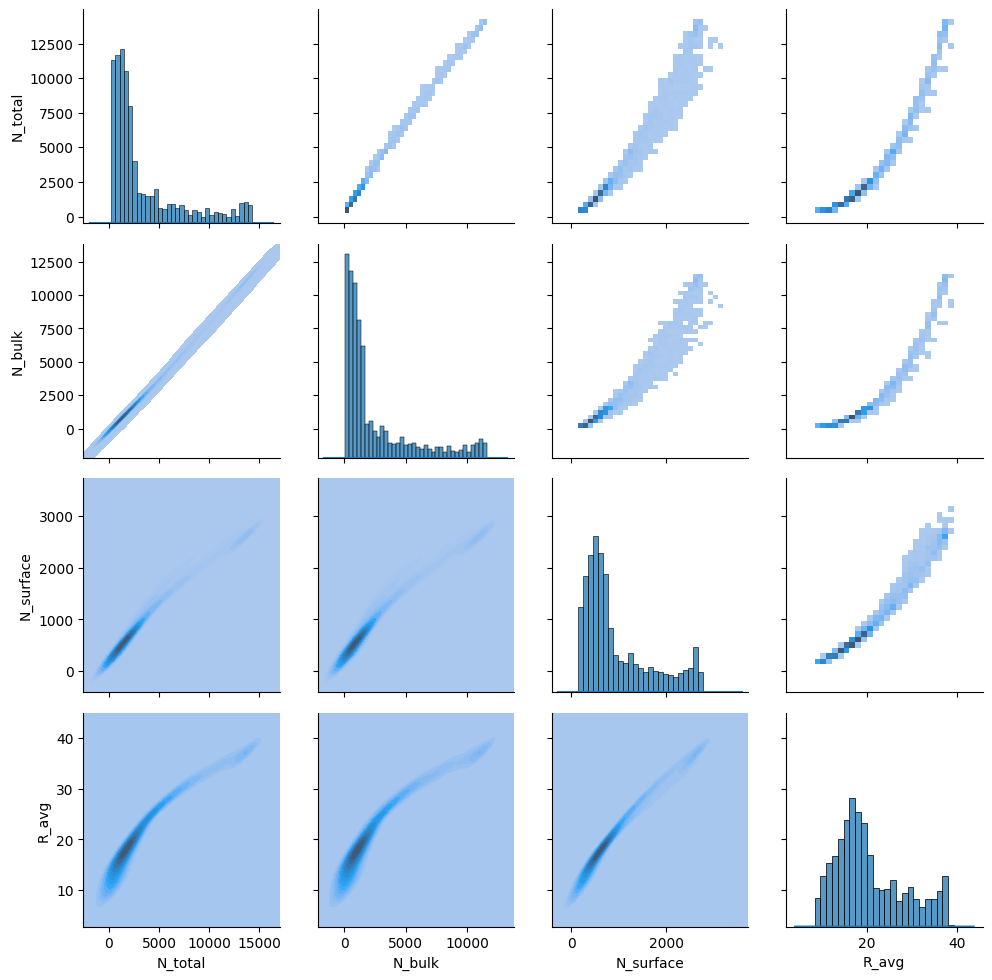

In [ ]:
g = sns.PairGrid(new_df)

# upper-right: 2D hist (bivariate histogram)
g.map_upper(sns.histplot)

# diagonal: histogram + KDE overlay
def diag_hist_kde(x, **kwargs):
    sns.histplot(x, **kwargs)
    sns.kdeplot(x=x)

g.map_diag(diag_hist_kde)

# lower-left: bivariate KDE
g.map_lower(sns.kdeplot, fill=True, thresh=0, levels=15)

plt.show()